<a href="https://colab.research.google.com/github/dushyantsinghraghav/Data_engineering/blob/main/random_forest_feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/housing.csv")
df.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [2]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [7]:
#Now we visualise our dataset
X = df[['latitude', 'longitude']]
Y = df['median_house_value']
x=df['latitude']
y=df['longitude']
z=df['median_house_value']

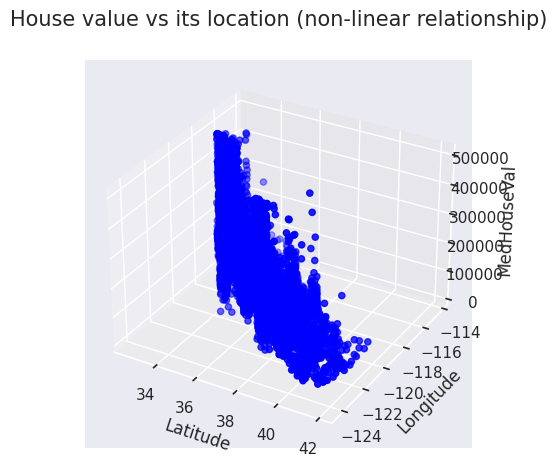

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set(style='darkgrid')

fig = plt.figure(figsize=(5, 10))
ax = plt.axes(projection='3d')

x=df['latitude']
y=df['longitude']
z=df['median_house_value']

ax.scatter3D(x, y, z, color='blue')
ax.set_title("House value vs its location (non-linear relationship)", pad=25, size=15)
ax.set_xlabel('Latitude') 
ax.set_ylabel('Longitude') 
ax.set_zlabel('MedHouseVal')

plt.savefig('3D Scatterplot.png')

In [11]:
#Now we build the base modelfor the random forest
#Import the class
from sklearn.ensemble import RandomForestRegressor

X = df[['latitude', 'longitude']] #Two-dimensional (pd DataFrame)
Y = df['median_house_value'] #One-dimensional (pd Series)

#Create an object (model)
rf = RandomForestRegressor(n_estimators=100, max_depth=2,
                           min_samples_split=2, random_state=1)

#Fit (train) the model
rf.fit(X, Y)

RandomForestRegressor(max_depth=2, random_state=1)

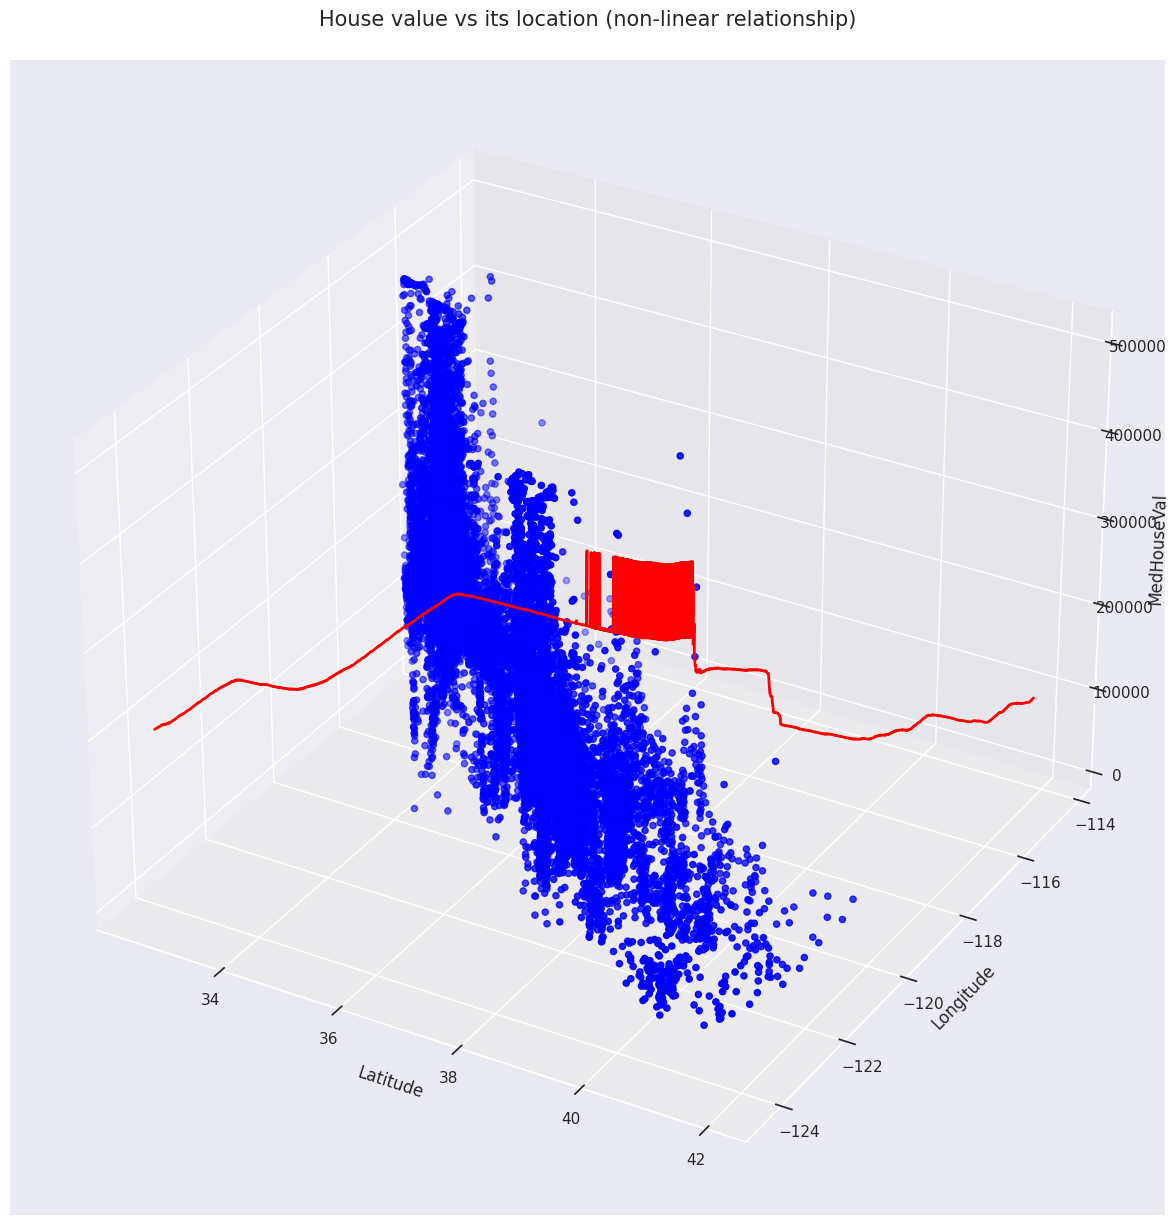

In [13]:
fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection='3d')

x=df['latitude']
y=df['longitude']
z=df['median_house_value']

ax.scatter3D(x, y, z, color='blue', label='data')
ax.set_title("House value vs its location (non-linear relationship)", pad=25, size=15)
ax.set_xlabel('Latitude') 
ax.set_ylabel('Longitude') 
ax.set_zlabel('MedHouseVal')

ax.plot3D(df['latitude'].sort_values(), df['longitude'].sort_values(),
          rf.predict(df[['latitude', 'longitude']].sort_values(by=['latitude', 'longitude'])),
          color='red', label='model', linewidth=2)

In [14]:
rf.estimators_[0] #First tree

DecisionTreeRegressor(max_depth=2, max_features=1.0, random_state=1791095845)

In [15]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(rf.estimators_[0], feature_names=['latitude', 'longitude'],  
                           filled=True, rounded=True)  

graph = graphviz.Source(dot_data, format='png')
graph.render("tree") 

'tree.png'

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10,
                                                    random_state=2,
                                                    shuffle=True)

from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor()

rs = RandomizedSearchCV(model, n_iter=10,
                        param_distributions = {'max_depth': range(1, 15),
                                               'min_samples_split': range(2, 50)},
                        cv=5, n_jobs=-1, random_state=3,
                        scoring='neg_mean_squared_error')

rs.fit(X_train, y_train)

print(rs.best_params_)
print(-rs.best_score_)

{'min_samples_split': 13, 'max_depth': 12}
3230332663.58041


In [18]:
#rebuild the model using optimal hyperparameter values
#Import the class
from sklearn.ensemble import RandomForestRegressor

X = df[['latitude', 'longitude']] #Two-dimensional (pd DataFrame)
Y = df['median_house_value'] #One-dimensional (pd Series)

#Create an object (model)
rf = RandomForestRegressor(n_estimators=100, max_depth=12,
                           min_samples_split=13, random_state=1)

#Fit (train) the model
rf.fit(X, Y)

RandomForestRegressor(max_depth=12, min_samples_split=13, random_state=1)

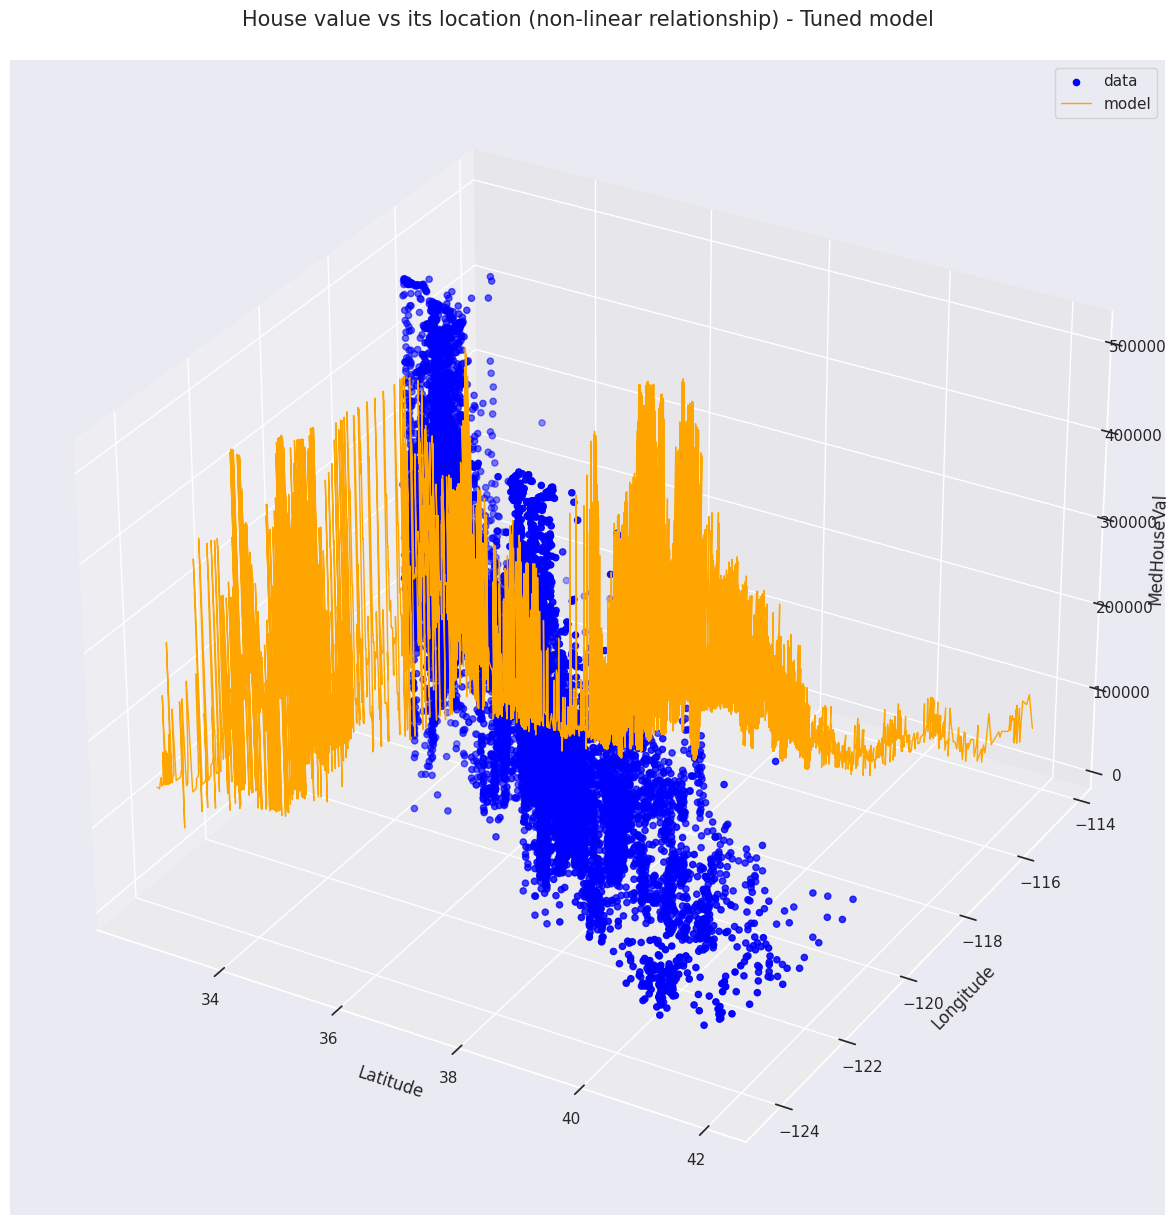

In [19]:
#visualising the tuned model
fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection='3d')

x=df['latitude']
y=df['longitude']
z=df['median_house_value']

ax.scatter3D(x, y, z, color='blue', label='data')
ax.set_title("House value vs its location (non-linear relationship) - Tuned model", pad=25, size=15)
ax.set_xlabel('Latitude') 
ax.set_ylabel('Longitude') 
ax.set_zlabel('MedHouseVal')

ax.plot3D(df['latitude'].sort_values(), df['longitude'].sort_values(),
          rf.predict(df[['latitude', 'longitude']].sort_values(by=['latitude', 'longitude'])),
          color='orange', label='model', linewidth=1)

plt.legend()

plt.savefig('Tuned model.png')

In [24]:
#Now we visualise the feature importance
from sklearn.ensemble import RandomForestRegressor
print(df.columns)
X=df[['longitude', 'latitude','housing_median_age', 'total_rooms','population', 'households', 'median_income']]
Y=df['median_house_value']
X.isnull().sum()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
dtype: int64

In [25]:
#Create an object (model)
rf = RandomForestRegressor(n_estimators=100, max_depth=12,
                           min_samples_split=13, random_state=1)

#Fit (train) the model
rf.fit(X, Y)

RandomForestRegressor(max_depth=12, min_samples_split=13, random_state=1)

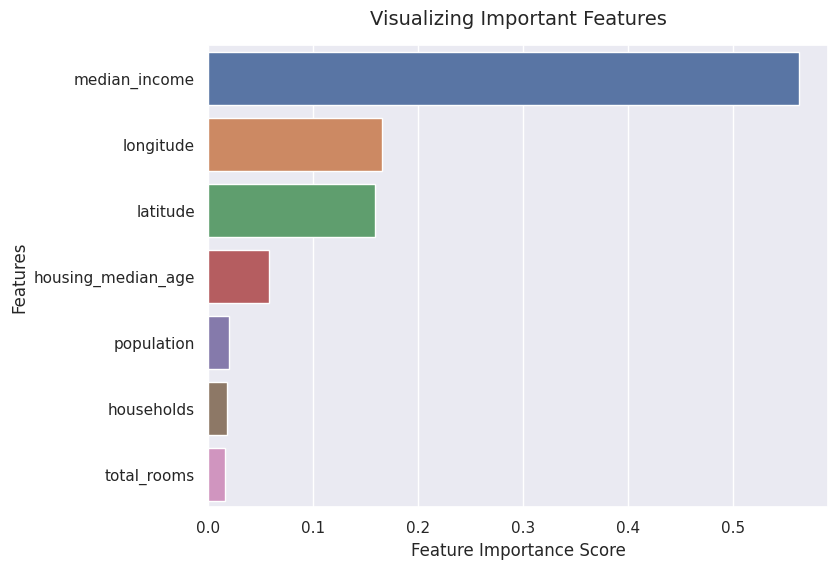

In [26]:
#then we visualise the feature importance
fig = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(rf.feature_importances_, 
                        index=['longitude', 'latitude','housing_median_age', 'total_rooms','population', 'households', 'median_income']).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')